# Conventional Methods


## Shape-based Algorthim

In [1]:
# Import necessary libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
# !pip install mahotas
# !pip install fastdtw
import mahotas
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean




### Loading Dataset and Assigning Labels


 genuine (1) or forged (0)

In [ ]:


# Base directory where the dataset is stored 
# base_directory = r"C:\Users\Downloads\archive (4)\sign_data\Dataset\train"  
# base_directory = r"C:\Users\lenovo\Downloads\4th-first\Biometrics\Project\sig_data\sign_data\Dataset\train"  
base_directory = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\train"  

# Initialize lists to hold image file paths and their corresponding labels (genuine or forged)
image_paths = []
labels = []

# Loop through each subfolder in the base directory
for folder in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder)# Get the full path of the folder
    
    # Check if it is a directory (i.e., signature folder)
    if os.path.isdir(folder_path):
        # Label assignment: "forg" in the folder name means forged signature
        if "forg" in folder:
            label = 0  # Forged signature
        else:
            label = 1  # Genuine signature
        
        # Get all image paths in this folder (assuming images are in PNG format)
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        
        # Add image paths and labels to lists
        for image_file in image_files:
            image_paths.append(image_file)
            labels.append(label)

# Convert labels to a numpy array for easier handling
labels = np.array(labels)

# Check the first few paths and labels to ensure correct loading
print(f"Loaded {len(image_paths)} images")
print(f"First 3 image paths: {image_paths[:3]}")
print(f"First 3 labels: {labels[:3]}")


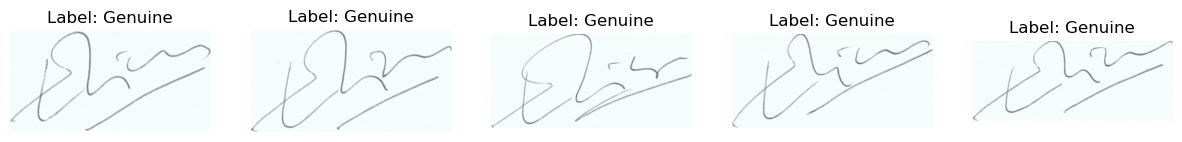

In [3]:
# Function to load and display the first few images
def display_images(image_paths, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    
    for i in range(min(num_images, len(image_paths))):
        image = cv2.imread(image_paths[i])  # Read the image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
        
        # Plotting the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(f"Label: {'Genuine' if labels[i] == 1 else 'Forged'}")
        plt.axis('off')
    
    plt.show()

# Display the first 5 images
display_images(image_paths, labels, num_images=5)


In [ ]:
image_paths


### Preprocessing 



This section preprocesses the signature images to prepare them for feature extraction and analysis.

1. **Grayscale Conversion**  
   Convert the images to grayscale to simplify the data and reduce complexity.

2. **Resizing**  
   Resize the images to a uniform size for consistency in processing.

3. **Binarization**  
   Convert the grayscale images into binary images using a thresholding technique.

4. **Noise Reduction**  
   Remove unwanted noise from the images to improve the accuracy of feature extraction.

In [5]:

# Function to load image and convert image to numpy array
def load_image(image_path):
    """
    Loads an image using PIL and converts it to a numpy array for OpenCV processing.
    
    Args:
        image_path (str): Path to the image file.
        
    Returns:
        np.ndarray: Image as a numpy array.
    """
    image = Image.open(image_path)
    return np.array(image)

# Function to display images
def show_image(image, title="Image"):
    """
    Displays an image using matplotlib.
    
    Args:
        image (np.ndarray): Image array to display.
        title (str): Title of the image plot.
    """
    plt.figure(figsize=(4, 4))
    plt.title(title)
    if len(image.shape) == 2:  # Grayscale image
        plt.imshow(image, cmap='gray')
    else:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()



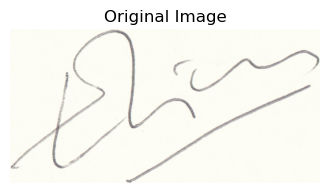

In [6]:
# Preprocessing Each Step
# Load the first image from the dataset
image_path = image_paths[0]  
image = load_image(image_path)

# Display the original image
show_image(image, title="Original Image")

**cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)**

**Parameters:**

1. **image**: Input color image.

2. **cv2.COLOR_RGB2GRAY**: Specifies the conversion from RGB to grayscale.



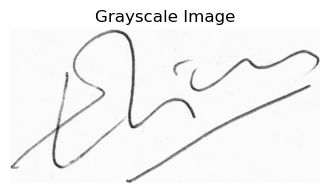

In [7]:
# Function for grayscale conversion
def convert_to_grayscale(image):
     """
    Converts a color image to grayscale.
    
    Args:
        image (np.ndarray): Input color image.
        
    Returns:
        np.ndarray: Grayscale image.
    """
     return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Convert the image to grayscale
image_gray = convert_to_grayscale(image)
# Display the grayscale image

show_image(image_gray, title="Grayscale Image")


**cv2.resize(image, target_size)**

**Parameters:**

1. **image**: Input image.

2. **target_size**: Target dimensions in pixels.

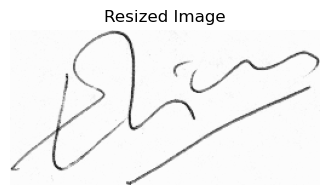

In [8]:
# Function for resizing an image
def resize_image(image, target_size=(256, 128)):
    """
    Resizes the image to a target size.
    
    Args:
        image (np.ndarray): Input image.
        target_size (tuple): Desired dimensions (width, height).
        
    Returns:
        np.ndarray: Resized image.
    """
    return cv2.resize(image, target_size)
# Resize the grayscale image
image_resized = resize_image(image_gray)
# Display the resized image
show_image(image_resized, title="Resized Image")


**cv2.adaptiveThreshold()**

The threshold value is determined locally for different parts of the image, rather than using a single global value. This allows it to handle varying lighting conditions or uneven illumination

**Parameters:**

1. **image**: Input grayscale image.
2. **255**: Maximum intensity value that a pixel can have after the thresholding process.(white)    
3. **cv2.ADAPTIVE_THRESH_GAUSSIAN_C**: Gaussian method for computing threshold values(The threshold value is the weighted sum of the neighborhood values, with weights being a Gaussian window)
4. **cv2.THRESH_BINARY**: Output pixels as 0 or 255 (Any pixel value greater than the threshold is set to the maximum value (255), and the rest are set to 0.)
5. **111**: Block size for local thresholding.
6. **2**: Constant subtracted from mean to fine-tune threshold.

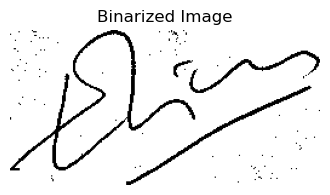

In [9]:
# Function for binarizing an image
def binarize_image(image):
     """
    Applies adaptive thresholding to binarize the image.
    
    Args:
        image (np.ndarray): Input grayscale image.
        
    Returns:
        np.ndarray: Binarized image.
    """
    # Apply adaptive thresholding
    #  adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
     adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 111, 2) #bigger block size make it less noisy
     return adaptive_thresh

# Binarize the resized image
image_binarized = binarize_image(image_resized)
# Display the binarized image

show_image(image_binarized, title="Binarized Image")


**cv2.medianBlur(image, ksize)**

Reduce noise preserving edges. It works by replacing each pixel's value with the median value of the pixel's neighbors within a specified window size.

**Parameters:**

1. **image**: Input image.

2. **ksize**: Kernel size (must be odd).


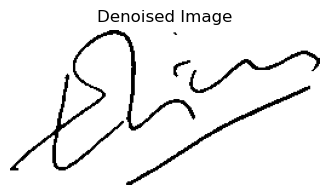

In [10]:
# Function for reducing noise
def reduce_noise(image):
    """
    Reduces noise using a median blur filter.
    
    Args:
        image (np.ndarray): Input binarized image.
        
    Returns:
        np.ndarray: Denoised image.
    """
    return cv2.medianBlur(image, 3)

# Apply noise reduction to the binarized image
image_denoised = reduce_noise(image_binarized)
# Display the denoised image
show_image(image_denoised, title="Denoised Image")


This function combines all preprocessing steps into a single pipeline, taking an image path as input and outputting a preprocessed image.



In [11]:
# Function for full preprocessing pipeline
def preprocess_image(image_path):
    """
    Performs all preprocessing steps: grayscale, resizing, binarization, and noise reduction.
    
    Args:
        image_path (str): Path to the input image.
        
    Returns:
        np.ndarray: Fully preprocessed image.
    """
    image = load_image(image_path) # Load image
    grayscale_image = convert_to_grayscale(image) # Grayscale conversion
    resized_image = resize_image(grayscale_image) # Resizing
    binarized_image = binarize_image(resized_image) # Binarization
    denoised_image = reduce_noise(binarized_image) # Noise reduction
    
    return denoised_image



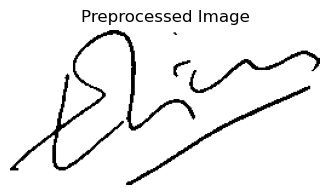

In [12]:
# img = r"C:\Users\lenovo\Downloads\4th-first\Biometrics\Project\sig_data\sign_data\Dataset\train\066_forg\01_0101066.PNG"
img_path = image_paths[0]
img = preprocess_image(img_path)
show_image(img, title="Preprocessed Image")

Applying the preproccessing steps on all images and saving the proccessed images with the same structure as the dataset

In [ ]:

# Directory to save processed images
# output_directory = r"C:\Users\lenovo\Downloads\4th-first\Biometrics\Project\sig_data\sign_data\Dataset\processed_train"
output_directory = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\processed_train"

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop through image paths, preprocess each image, and save the result
for image_path in image_paths:
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Extract the image filename and folder name
    image_filename = os.path.basename(image_path) # File name of the image
    folder_name = os.path.basename(os.path.dirname(image_path)) # Parent folder name

    # Create a corresponding folder in the output directory
    output_folder = os.path.join(output_directory, folder_name)
    os.makedirs(output_folder, exist_ok=True) # Create the folder if it doesn't exist
    # Define the path to save the preprocessed image
    output_image_path = os.path.join(output_folder, image_filename)
    # Save the processed image
    cv2.imwrite(output_image_path, preprocessed_image)
    # Log the path of the saved image
    print(f"Processed and saved: {output_image_path}")

### Feature Extraction

Saving the paths of the made processed images in **processed_image_paths** list and assigning corresponding labels based on whether the signature is genuine or forged in **processed_labels** list.

In [ ]:

# Base directory where the dataset is stored (train folder)
# base_directory = r"C:\Users\lenovo\Downloads\4th-first\Biometrics\Project\sig_data\sign_data\Dataset\processed_train"  # Update this path as necessary
base_directory = r"C:\Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\processed_train"


# Lists to hold image paths and corresponding labels (genuine or forged)
processed_image_paths = []
processed_labels = []

# Loop through each folder in the base directory
for folder in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder)
    
    # Check if it is a directory (i.e., signature folder)
    if os.path.isdir(folder_path):
        # Label assignment: "forg" in the folder name means forged signature
        if "forg" in folder:
            label = 0  # Forged signature
        else:
            label = 1  # Genuine signature
        
        # Get all image paths in this folder (assuming images are in PNG format)
        image_files = glob.glob(os.path.join(folder_path, "*.png"))
        
        # Add image paths and labels to lists
        for image_file in image_files:
            processed_image_paths.append(image_file)
            processed_labels.append(label)

# Convert labels to a numpy array for easier handling
processed_labels = np.array(processed_labels)

# Check the first few paths and labels to ensure correct loading
print(f"Loaded {len(processed_image_paths)} images")
print(f"First 3 image paths: {processed_image_paths[:3]}")
print(f"First 3 labels: {processed_labels[:3]}")

#### Extracting features

Computes gradient-based features for a given image using Sobel operators, which calculate the rate of intensity change (gradient) in the x and y directions. These features are useful in detecting edges and patterns in the image.

**Gradient Magnitude**: Captures the strength of the edges.

**Gradient Angle**: Indicates the direction of the edges.

**cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)** 

1. **image**: The input image in grayscale for edge detection.

2. **cv2.CV_64F**: The data type for the output image. cv2.CV_64F ensures the result can capture negative gradients (important for preserving signed values during edge detection).

3. **1**: The order of the derivative in the x-direction (horizontal gradient). Setting this to 1 computes the first derivative along the x-axis.

4. **0**: The order of the derivative in the y-direction (vertical gradient). Setting this to 0 means no derivative is calculated along the y-axis.

5. **ksize=3**:The size of the kernel. A larger kernel smooths the result more but can also blur details.


**cv2.magnitude(grad_x, grad_y)**


1. **Magnitude**: The magnitude of the gradient at each pixel is calculated as:

   $$
   \text{magnitude} = \sqrt{(\text{grad}_x)^2 + (\text{grad}_y)^2}
   $$

 
**cv2.phase(grad_x, grad_y, angleInDegrees=True)** 

2. **Angle**: The angle of the gradient at each pixel is calculated as:

   $$
   \text{angle} = \arctan\left(\frac{\text{grad}_y}{\text{grad}_x}\right)
   $$

   This angle gives the direction of the edge at that pixel. The result is in radians, but in the code, it's converted to degrees.




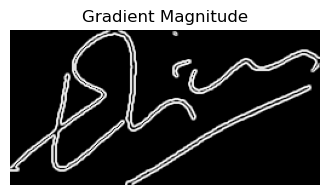

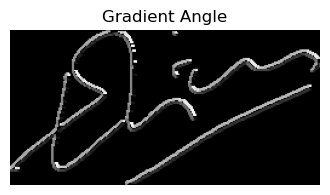

In [15]:
# 1. Compute Gradients (Sobel operators)
def compute_gradients(image):
    """
    Computes the gradient magnitude and gradient angle of the input image using Sobel operators.

    Parameters:
    - image: Grayscale input image 

    Returns:
    - gradient_magnitude: Magnitude of the gradients, representing the edge intensity.
    - gradient_angle: Angle of the gradients, representing the direction of the edges.
    
    """
    # Sobel operators to compute gradients in x and y direction
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Magnitude of gradients
    gradient_magnitude = cv2.magnitude(grad_x, grad_y)

    # Angle of gradients
    gradient_angle = cv2.phase(grad_x, grad_y, angleInDegrees=True)

    return gradient_magnitude, gradient_angle

# Select the first image for demonstration
processed_image_path = processed_image_paths[0] 
# Load the image in grayscale using the helper function
processed_image = load_image(processed_image_path)
# Compute gradients
gradient_magnitude, gradient_angle = compute_gradients(processed_image)

# Display gradient magnitude
show_image(gradient_magnitude, title="Gradient Magnitude")

# Display gradient angle
show_image(gradient_angle, title="Gradient Angle")

Find Contours: Using **cv2.findContours(image, mode, method)**.
**cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)**

1. **image**: preprocessed image (like thresholding or edge detection) so that contours can be clearly detected.

2. **cv2.RETR_EXTERNAL**: A flag that tells OpenCV to retrieve only the outermost contours, ignoring any inner contours (this is useful for detecting the boundaries of objects).

3. **cv2.CHAIN_APPROX_SIMPLE**: This flag reduces the number of points required to represent a contour. Only the endpoints of the contour segments are stored, effectively simplifying it.

**cv2.convexHull(contour)**: Computes the convex hull of a contour.
1. The convex hull is the smallest convex shape that "wraps" around the contour, forming the smallest possible convex shape that can enclose the contour.
2. The argument returnPoints=False means the convex hull will be returned as a list of indices of the contour's points, not the actual points.

**cv2.convexityDefects(contour, hull)**:
1. this function checks for spots where the contour goes inward (a "dip" or "defect") by comparing the contour to its convex hull.
2. *What does it return?:* It gives us information about each defect, including its start point, end point, and the depth (how much the contour dips inward at that point).


In [16]:
# 2. Extract Contours and Concavities (Defects)
def extract_contours(image):
    """
    Extracts the contours and convexity defects (concavities) from a binary image.

    Parameters:
    - image: A binary image where contours are to be detected.

    Returns:
    - contours: A list of contours found in the image. Each contour is a list of points representing the boundary of an object.
    - contour_features: A list of features corresponding to each contour. For each contour, this list contains the depth of convexity defects (concavities).
     """
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_features = []

    # Filter small contours and extract convexity defects
    for contour in contours:
        # Skip contours that are too small (less than 3 points) as they are not considered useful for further processing
        if len(contour) < 3:
            continue
        
        hull = cv2.convexHull(contour, returnPoints=False)

        try:
            defects = cv2.convexityDefects(contour, hull)
            if defects is not None:
                # List of concavities (defects)
                defects_list = []
                for i in range(defects.shape[0]):
                    #s: Start index of the defect.
                    # e: End index of the defect.
                    # f: Farthest point from the contour's convex hull.
                    # d: The actual depth of the defect (i.e., how much the contour deviates inward).
                    s, e, f, d = defects[i, 0]
                    defects_list.append(d)
                
                contour_features.append(np.array(defects_list))
        except cv2.error as e:
            print(f"Error calculating convexity defects for contour: {e}")
            continue  # Skip contour if there's an error

    return contours, contour_features


# Extract contours and concavities (defects)
contours, contour_features = extract_contours(processed_image)




#### Curvature Estimation

This function calculates the curvature of a contour, which is a measure of how much the contour bends or deviates from a straight line.

The curvature is estimated using the average of the absolute differences in the x-coordinates of consecutive points along the contour. Mathematically, this can be represented as:

This equation calculates the average change in the x-coordinates, which serves as a simplified approximation of the curvature.


In [17]:
#np.diff(contour[:, 0]): This calculates the difference between consecutive x-coordinates of the points in the contour.
#contour[:, 0] extracts the x-coordinates of all points in the contour.
#np.diff() computes the difference between each consecutive x-coordinate. This represents the change in the x-direction, which contributes to curvature.
#np.abs(): The absolute value is taken to ensure we're measuring how much the contour deviates without considering direction.
#np.mean(): Finally, the mean of these differences is computed to give a simplified measure of curvature for the contour.

In [18]:

# 3. Extract Curvatures (simplified version)
def extract_curvatures(contours):
    """
    This function calculates the curvature of each contour in a given list of contours. (Curvature refers to how much the contour bends at different points.)

    Parameters:
        contours (list of ndarray): A list of contours, where each contour is an array of points (x, y coordinates).

    Returns:
        curvatures (list of float): A list containing the average curvature for each contour.
    """
    
    # Initialize an empty list to store curvature values for each contour
    curvatures = []
    
    # Iterate over all contours in the list
    for contour in contours:
        # Check if the contour has enough points to calculate curvature (at least 3 points)
        if len(contour) >= 3:
            # Calculate the difference between consecutive x-coordinates of the contour points
            # np.diff calculates the difference between consecutive elements in an array
            # contour[:, 0] extracts the x-coordinates of the contour points
            curvature = np.mean(np.abs(np.diff(contour[:, 0])))  # Use absolute difference for curvature estimation
            
            # Append the calculated curvature to the curvatures list
            curvatures.append(curvature)
    
    # Return the list of calculated curvatures for all contours
    return curvatures

# Print concavities (defects) in contours
for contour_feature in contour_features:
    # Print the concavities (defects) detected in each contour
    print("Concavities:", contour_feature)  # Just print out for each contour

# Calculate curvatures for all contours
curvatures = extract_curvatures(contours)

# Print the calculated curvatures for all contours
print("Curvatures:", curvatures)


Concavities: [23287   114   154   154 15433 20992 27648]
Concavities: [8334 6926]
Curvatures: [97.10271903323263, 29.429906542056074]


In [19]:
# Function to extract shape features
def extract_shape_features(image):
    """
    This function extracts shape-related features and combine them into a single feature vector.

    Parameters:
        image (ndarray): The input image for which the features need to be extracted.

    Returns:
        np.array: A feature vector containing all the extracted features for the input image.
    """
    # 1. Compute Gradients
    gradient_magnitude, gradient_angle = compute_gradients(image)
    # 2. Extract Contours and Concavities (Defects)
    contours, contour_features = extract_contours(image)
    # 3. Extract Curvatures
    curvatures = extract_curvatures(contours)

    # 4. Flatten all features into a single feature vector
    feature_vector = []
    # Adding gradient magnitude and angle to the feature vector
    # flatten() method converts any 2D or higher dimensional arrays into 1D arrays
    feature_vector.extend(gradient_magnitude.flatten())
    feature_vector.extend(gradient_angle.flatten())
    # Adding contour features (concavities) to the feature vector
    for contour in contour_features:
        feature_vector.extend(contour.flatten())
    # Adding curvatures to the feature vector
    feature_vector.extend(curvatures)

    return np.array(feature_vector)


In [20]:
# Main processing function to show output for a given image
def preprocess_and_show_features(image_path):
 
    image = load_image(image_path) # Load the image
    # Extract shape features
    feature_vector = extract_shape_features(image)

    return feature_vector

In [21]:
preprocess_and_show_features(processed_image_paths[0] )


array([   0.        ,    0.        ,    0.        , ..., 6926.        ,
         97.10271903,   29.42990654])

In [22]:
# Function to encode the feature vector to a binary vector
def encode_feature_vector_to_binary(feature_vector, threshold=0.5):
     """
    This function encodes a given feature vector into a binary vector based on a specified threshold. Any feature value greater than this threshold will become 1 (True), and any value lower will become 0 (False).
    
    Parameters:
        feature_vector (np.array): The input feature vector.
        threshold (float, optional): The threshold value used to encode the feature vector. 

    Returns:
        np.array: A binary vector where each value is either 0 or 1 .
    """
     #.astype(int) converts the boolean values (True/False) to integers (1/0).
     return (feature_vector > threshold).astype(int)


In [23]:

def extract_person_feature_vectors(image_paths):
    """
    Extracts feature vectors for each person and categorizes them into genuine and forged.
    
    Parameters:
        image_paths (list): List of paths to the signature images.
        
    Returns:
        dict: Dictionary with person IDs as keys, and lists of feature vectors (genuine and forged) as values.
    """
    person_feature_dict = {}

    # Loop through each image and label
    for image_path, label in zip(image_paths, labels):
        # Load the image
        image = load_image(image_path)
        
        # Extract features from the image
        feature_vector = extract_shape_features(image)
        
        # Get the person ID from the image path by splitting it and grabbing the second-to-last part
        person_id = image_path.split(os.sep)[-2]  # folder structure like 'Dataset/processed/001/genuine/001_01.png'  [-2] retrieves '001'
        
        # Remove '_forg' from person_id if it's present
        if '_forg' in person_id:
            person_id = person_id.replace('_forg', '')  # Strip '_forg' to get the correct person ID
            
        # print("person_id", person_id)
   
        
        # Initialize the person ID in the dictionary if not already present
        if person_id not in person_feature_dict:
            person_feature_dict[person_id] = {'genuine': [], 'forged': []}
        
        # Check if the image is forged or genuine based on the path
        if "_forg" in image_path:  # Check if the image contains '_forg' to identify forged signatures
            person_feature_dict[person_id]['forged'].append(feature_vector)
        else:  # Genuine signature
            person_feature_dict[person_id]['genuine'].append(feature_vector)

    return person_feature_dict




person_feature_dict = extract_person_feature_vectors(processed_image_paths)
person_feature_dict


Error calculating convexity defects for contour: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'
Error calculating convexity defects for contour: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'
Error calculating convexity defects for contour: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\convhull.cpp:360: error: (-5:Bad argument) The convex hull indices are not monotonous, which can be in the case when the input contour contains self-intersections in function 'cv::convexityDefects'
Error calculating convexity defects f

{'001': {'genuine': [array([   0.        ,    0.        ,    0.        , ..., 6926.        ,
            97.10271903,   29.42990654]),
   array([  0.        ,   0.        ,   0.        , ..., 126.        ,
           99.43896104,  38.67241379]),
   array([  0.        ,   0.        ,   0.        , ..., 126.33333333,
           66.89481481,  64.37662338]),
   array([  0.        ,   0.        ,   0.        , ...,  78.48626374,
          124.62837838,  42.01265823]),
   array([  0.        ,   0.        ,   0.        , ..., 125.        ,
          106.66756757,  35.56321839]),
   array([    0.        ,     0.        ,     0.        , ...,
          22391.        ,    39.22352941,   101.41076487]),
   array([   0.        ,    0.        ,    0.        , ..., 4439.        ,
            92.43902439,   42.68115942]),
   array([   0.        ,    0.        ,    0.        , ..., 3582.        ,
            96.46363636,   52.58333333]),
   array([ 0.        ,  0.        ,  0.        , ..., 93.0909090

#### Bit wise similarity

In [24]:

# Function to pad feature vectors to a common length
def pad_feature_vector(feature_vector, target_length):
        """
        Pads a feature vector to a specified target length using zeros or truncates it if longer.
        
        Parameters:
            feature_vector (numpy.ndarray): The input feature vector to be padded or truncated.
            target_length (int): The desired length of the output feature vector.
        
        Returns:
            numpy.ndarray: The feature vector padded to the target length.
        """
         # Check if the feature vector is shorter than the target length
        if len(feature_vector) < target_length:
        # Pad with zeros if the feature vector is shorter than the target length
        # np.pad: Adds values (zeros here) to an array.
        # Parameters:
        #   - (feature_vector, (padding_before, padding_after)): Defines padding dimensions.
        #   - mode='constant': Pads with a constant value (default: 0).
        #   - constant_values=0: Specifies the constant value to pad with.
           feature_vector = np.pad(feature_vector, (0, target_length - len(feature_vector)), mode='constant', constant_values=0)
        
        # Check if the feature vector is longer than the target length
        elif len(feature_vector) > target_length:
            # Truncate the feature vector if it's longer than the target length (optional)
            feature_vector = feature_vector[:target_length]

        return feature_vector

# Function to compute bitwise similarity score between two binary vectors
def bitwise_similarity(binary_vector1, binary_vector2):
        """
        Computes the similarity score between two binary vectors based on bitwise comparison.
        
        Parameters:
            binary_vector1 (numpy.ndarray): The first binary vector (e.g., array of 0s and 1s).
            binary_vector2 (numpy.ndarray): The second binary vector (e.g., array of 0s and 1s).
        
        Returns:
            int: The similarity score based on the number of matching bits between the two vectors.
        """
        # Ensure both vectors have the same length
        target_length = max(len(binary_vector1), len(binary_vector2))  # Use the length of the longest vector
        # Pad both vectors to the same target length
        binary_vector1 = pad_feature_vector(binary_vector1, target_length)
        binary_vector2 = pad_feature_vector(binary_vector2, target_length)
        
        # XOR operation (1 if bits are different, 0 if the same)
        xor_result = binary_vector1 ^ binary_vector2
         # Calculate the similarity score
        similarity_score = np.sum(xor_result == 0)  # Number of bits that are the same
        
        return similarity_score

### Signature Identification

In [ ]:
def identify_signature(test_image_path, person_feature_dict):
    """
    Identifies the person from the test signature by comparing the test signature to the training set.
    
    Parameters:
        test_image_path (str): Path to the test image (signature).
        person_feature_dict (dict): Dictionary with person IDs as keys, and lists of genuine and forged feature vectors as values.
    
    Returns:
        person_id (str): The ID of the person whose signature matches the test image.
    """
    # Preprocess the test image
    test_image = preprocess_image(test_image_path)
    
    # Extract features from the test image
    test_feature_vector = extract_shape_features(test_image)
    
    # Convert the test feature vector to binary
    test_binary_vector = encode_feature_vector_to_binary(test_feature_vector)
    
    # Variables to store the highest similarity score and the corresponding person ID
    highest_similarity = -1
    best_person_id = None
    
    # Loop through each person in the dictionary
    for person_id, feature_dict in person_feature_dict.items():
        # Get the genuine and forged feature vectors for the current person
        genuine_vectors = feature_dict['genuine']
        forged_vectors = feature_dict['forged']
        
        # Compare with each genuine signature
        for genuine_vector in genuine_vectors:
            genuine_binary_vector = encode_feature_vector_to_binary(genuine_vector)
            similarity_score = bitwise_similarity(test_binary_vector, genuine_binary_vector)
            
            if similarity_score > highest_similarity:
                highest_similarity = similarity_score
                best_person_id = person_id
        
        # You can optionally compare with forged signatures to calculate the risk of misidentification
        # This could be useful for further validation, but we're focusing on the best genuine match
        # for identifying the person.
        for forged_vector in forged_vectors:
            forged_binary_vector = encode_feature_vector_to_binary(forged_vector)
            similarity_score = bitwise_similarity(test_binary_vector, forged_binary_vector)
            
            if similarity_score > highest_similarity:
                highest_similarity = similarity_score
                best_person_id = person_id

    return best_person_id , highest_similarity


# test_image_path = r"C:\Users\hazem\Downloads\Dataset\train\066\02_066.png"
# test_image_path = r"C:\PyCharm codes \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\train\066_forg\01_0101066.PNG"
test_image_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\test\052\02_052.png"


# Identify the person based on the highest similarity score
person_id , shape_based_score = identify_signature(test_image_path, person_feature_dict)

# Output the ID of the person
print(f"The signature matches the person with ID: {person_id}")



The signature matches the person with ID: 052


### Signature Verification

In [ ]:
def signature_verification(test_image_path, person_id, person_feature_dict):
    """
    Verifies the signature by comparing the test signature to the genuine and forged signatures of the person.
    
    Parameters:
        test_image_path (str): Path to the test image (signature).
        person_id (str): The ID of the person whose signature is being verified.
        person_feature_dict (dict): Dictionary with person IDs as keys, and lists of genuine and forged feature vectors as values.
    
    Returns:
        verification_result (str): "Genuine" if the signature is verified as genuine, "Forged" if forged.
    """
    # Preprocess the test image
    test_image = preprocess_image(test_image_path)
    
    # Extract features from the test image
    test_feature_vector = extract_shape_features(test_image)
    
    # Convert the test feature vector to binary
    test_binary_vector = encode_feature_vector_to_binary(test_feature_vector)
    
    # Retrieve the genuine and forged feature vectors for the person
    genuine_vectors = person_feature_dict.get(person_id, {}).get('genuine', [])
    forged_vectors = person_feature_dict.get(person_id, {}).get('forged', [])
    
    # print("genuine_vectors:", genuine_vectors)
    # print("forged_vectors:", forged_vectors)
    
    # Variables to store the highest similarity score
    highest_genuine_similarity = -1
    highest_forged_similarity = -1
    
    # Compare the test signature with all genuine feature vectors
    for genuine_vector in genuine_vectors:
        genuine_binary_vector = encode_feature_vector_to_binary(genuine_vector)
        similarity_score = bitwise_similarity(test_binary_vector, genuine_binary_vector)
        if similarity_score > highest_genuine_similarity:
            highest_genuine_similarity = similarity_score
    
    # Compare the test signature with all forged feature vectors
    for forged_vector in forged_vectors:
        forged_binary_vector = encode_feature_vector_to_binary(forged_vector)
        similarity_score = bitwise_similarity(test_binary_vector, forged_binary_vector)
        if similarity_score > highest_forged_similarity:
            highest_forged_similarity = similarity_score
    
    # Determine whether the signature is genuine or forged based on the highest similarity scores
    if highest_genuine_similarity > highest_forged_similarity:
        verification_result = "Genuine"
    else:
        verification_result = "Forged"
    
    return verification_result


# test_image_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\train\066\02_066.png"

# test_image_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\test\052\02_052.png"

test_image_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\test\052_forg\02_0109052.PNG"

# Person ID you want to verify the signature against (e.g., '051')
person_id = '052'

# Verify the signature
verification_result = signature_verification(test_image_path, person_id, person_feature_dict)

# Output the verification result
print(f"The signature is: {verification_result}")


The signature is: Forged


## Contour-based Algorthim

In [ ]:
# Define the dataset path
# data_path = r"C:\Users\hazem\Downloads\Dataset\train" 
data_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\train"  


In [203]:
# List all subfolders (persons)
persons = sorted(os.listdir(data_path))
print("Found persons:", persons)

# Display sample images from each person
for person in persons:
    person_folder = os.path.join(data_path, person)
    sample_images = os.listdir(person_folder)[:3]  # Get the first 3 samples
    
    print(f"\nPerson {person} - Samples:")
    for sample in sample_images:
        img_path = os.path.join(person_folder, sample)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        
        # # Display the image
        # plt.figure()
        # plt.imshow(img, cmap="gray")
        # plt.title(f"Person {person} - {sample}")
        # plt.axis("off")
        # plt.show()/ 

Found persons: ['001', '001_forg', '002', '002_forg', '003', '003_forg', '004', '004_forg', '006', '006_forg', '009', '009_forg', '012', '012_forg', '013', '013_forg', '014', '014_forg', '015', '015_forg', '016', '016_forg', '017', '017_forg', '018', '018_forg', '019', '019_forg', '020', '020_forg', '021', '021_forg', '022', '022_forg', '023', '023_forg', '024', '024_forg', '025', '025_forg', '026', '026_forg', '027', '027_forg', '028', '028_forg', '029', '029_forg', '030', '030_forg', '031', '031_forg', '032', '032_forg', '033', '033_forg', '034', '034_forg', '035', '035_forg', '036', '036_forg', '037', '037_forg', '038', '038_forg', '039', '039_forg', '040', '040_forg', '041', '041_forg', '042', '042_forg', '043', '043_forg', '044', '044_forg', '045', '045_forg', '046', '046_forg', '047', '047_forg', '048', '048_forg', '049', '049_forg', '050', '050_forg', '051', '051_forg', '052', '052_forg', '053', '053_forg', '054', '054_forg', '055', '055_forg', '056', '056_forg', '057', '057_for

In [204]:
# Function to apply adaptive thresholding and morphological closing
def preprocess_image(img):
    # Apply adaptive thresholding (better for varying lighting conditions)
    binary_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    ##convert a grayscale image into a binary image (black and white image) 255 threshold
    ## adaptive thresholding,  divided into smaller regions (often defined by a "block size"), 
    #  the threshold is computed locally for each of these regions.
    ## the local threshold value using a Gaussian weighted sum.
    ## THRESH_BINARY_INV:: pixels above the threshold will be black (0), and those below will be white (255).
    ## 11: The size of the neighborhood (block size) considered for calculating the threshold for each pixel
    ## 2: A constant subtracted from the mean or weighted mean 
    # Perform morphological closing with a smaller kernel to connect letters that are close but not exactly touching
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 3))
    ##kernel defines how the morphological transformation will be applied
    morph_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel, iterations=2)
    ##MORPH_CLOSE: Dilation followed by Erosion.
    ##used to fill small holes or gaps within the foreground objects
    # an incomplete "e" is more likely to become a complete "e", making the text easier to read for the OCR system.
    return morph_img

In [205]:
# Function to extract the largest contour from a processed image
def extract_contour(repaired_img):
    contours, _ = cv2.findContours(repaired_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the largest contour (assumed to be the signature)
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

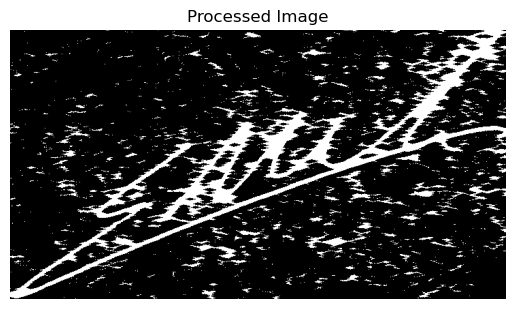

In [206]:
# Preprocess a sample image
sample_person = persons[24]  # First person
sample_file = os.listdir(os.path.join(data_path, sample_person))[0]  # First file
sample_path = os.path.join(data_path, sample_person, sample_file)

# Read and preprocess
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
processed_img = preprocess_image(img)

# Visualize the processed image
plt.imshow(processed_img, cmap='gray')
plt.title("Processed Image")
plt.axis("off")
plt.show()

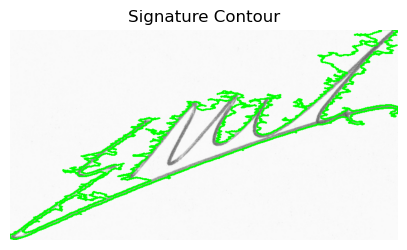

In [207]:
# Extract the contour
signature_contour = extract_contour(processed_img)

# Draw the contour on the original image for visualization
contour_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for visualization
cv2.drawContours(contour_img, [signature_contour], -1, (0, 255, 0), 2)  # Draw in green

# Show the contour on the image
plt.figure(figsize=(5, 5))
plt.imshow(contour_img)
plt.title("Signature Contour")
plt.axis("off")
plt.show()

In [208]:


# Function to normalize a contour to a fixed number of points
def normalize_contour(contour, num_points=100):
    # Flatten the contour array and calculate cumulative arc length
    contour = contour[:, 0, :]  # Remove extra dimension
    arc_length = cv2.arcLength(contour, closed=False)
    
    # Resample the contour
    step = arc_length / (num_points - 1)
    normalized_contour = [contour[0]]
    cumulative_dist = 0.0

    for i in range(1, len(contour)):
        pt_dist = np.linalg.norm(contour[i] - contour[i - 1])
        cumulative_dist += pt_dist

        if cumulative_dist >= step:
            normalized_contour.append(contour[i])
            cumulative_dist = 0.0

    return np.array(normalized_contour)

In [209]:
# Function to compute Zernike moments using mahotas
def compute_zernike_features_mahotas(contour, image_shape=(256, 256), radius=128):
    # Create a blank binary image
    binary_img = np.zeros(image_shape, dtype=np.uint8)

    # Draw the normalized contour onto the binary image
    contour = np.int32(contour)  # Convert to integer
    cv2.drawContours(binary_img, [contour], -1, 255, thickness=-1)  # Fill contour

    # Compute Zernike moments
    zernike_features = mahotas.features.zernike_moments(binary_img, radius)
    return zernike_features

In [210]:
# Function to compute DTW distance between two contours
def compute_dtw_distance(contour1, contour2):
    # Use fastdtw to compute the DTW distance
    distance, _ = fastdtw(contour1, contour2, dist=euclidean)
    return distance

In [211]:
# Create a database of features for all reference signatures
feature_database = {}

for person in persons:
    person_folder = os.path.join(data_path, person)
    feature_database[person] = []
    
    for sample in os.listdir(person_folder):
        # Read and preprocess
        img_path = os.path.join(person_folder, sample)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        processed_img = preprocess_image(img)
        
        # Extract contour and normalize
        contour = extract_contour(processed_img)
        normalized = normalize_contour(contour)
        
        # Extract Zernike moments and store
        zernike_features = compute_zernike_features_mahotas(normalized)
        feature_database[person].append(zernike_features)

print("Feature database created successfully!")

Feature database created successfully!


In [212]:
def recognize_signature(test_img_path, feature_database, threshold=1.5):
    # Preprocess test image
    img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
    processed_img = preprocess_image(img)
    
    # Extract contour and normalize
    contour = extract_contour(processed_img)
    normalized = normalize_contour(contour)
    test_features = compute_zernike_features_mahotas(normalized)

    # Flatten test features to 1-D if they aren't already
    test_features_flat = test_features.flatten() if test_features.ndim > 1 else test_features

    # Reshape to 2-D for DTW
    test_features_reshaped = test_features_flat.reshape(-1, 1)  # (25, 1)

    best_match = None
    best_distance = float('inf')

    for person, features in feature_database.items():
        for ref_features in features:
            # Flatten reference features to 1-D if they aren't already
            ref_features_flat = ref_features.flatten() if ref_features.ndim > 1 else ref_features

            # Reshape to 2-D for DTW
            ref_features_reshaped = ref_features_flat.reshape(-1, 1)  # (25, 1)

            # Compute DTW distance between reshaped feature vectors
            distance = compute_dtw_distance(test_features_reshaped, ref_features_reshaped)
            # print("distance: ",distance)
            if distance < best_distance:
                best_distance = distance
                best_match = person

    if best_distance <= threshold:
        return best_match, best_distance
    else:
        return "Unknown", best_distance


In [ ]:
# test_path = os.path.join(data_path, persons[0], os.listdir(os.path.join(data_path, persons[0]))[0])
# test_path =  r"C:\Users\hazem\Downloads\Dataset\train\066\02_066.png"
test_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\sign_data\Dataset\train\066\02_066.png"
result, distance = recognize_signature(test_path, feature_database)

print(f"Recognized as: {result} (DTW Distance: {distance})")

Recognized as: 066 (DTW Distance: 0.0)


## Combining the two methods

Weighted or averaged scoring approach to make a final decision.

In [214]:
def combine_signature_verification(contour_based_result, contour_score, shape_based_result, shape_score, contour_weight=0.5, shape_weight=0.5):
    """
    Combines the results of the contour-based and shape-based methods.

    Parameters:
        contour_based_result (str): Result (e.g., person ID or "Unknown") from the contour-based method.
        contour_score (float): Similarity score from the contour-based method.
        shape_based_result (str): Result (e.g., person ID or "Unknown") from the shape-based method.
        shape_score (float): Similarity score from the shape-based method.
        contour_weight (float): Weight for the contour-based method (default 0.5).
        shape_weight (float): Weight for the shape-based method (default 0.5).

    Returns:
        final_result (str): Combined decision on the signature's identity.
        final_score (float): Combined similarity score.
    """
    
    if contour_score == 0 and shape_score == 0:
        # Avoid division by zero
        return "Unknown", 0
    #Scores are normalized to ensure comparability (since lower scores in DTW indicate a better match, we invert them).
    # Normalize scores to ensure comparability 
    # Inversion (1 / score):
    # In methods like DTW a lower score indicates a better match (closer similarity).
    # By inverting the score, we convert it to a higher value for a better match, aligning it with the interpretation of scores from other methods where higher is better.
    # Adding 1e-6: small constant added to avoid division by zero in case score equals 0.It ensures stability in the computation.
    # # After normalization, both methods produce scores where higher values represent better matches, making them directly comparable.
    contour_score_normalized = 1 / (contour_score + 1e-6)
    shape_score_normalized = 1 / (shape_score + 1e-6)

    # Weighted combination of normalized scores
    final_score = (contour_weight * contour_score_normalized) + (shape_weight * shape_score_normalized)

    # Decision logic: prioritize matching results, fallback to best score
    if contour_based_result == shape_based_result:
        final_result = contour_based_result
    elif contour_score <= shape_score:
        final_result = contour_based_result
    else:
        final_result = shape_based_result

    return final_result, final_score



Weights reflect the relative importance or reliability of each method based on their performance, complementarity, and stability.

The best weights are often determined through experimentation and testing on real data.

In [215]:

# test_img_path = r"C:\Users\lenovo\Downloads\4th-first\Biometrics\Project\sig_data\sign_data\Dataset\train\066\02_066.png"

# Contour-based result and score
contour_based_result = result47
contour_score = distance

# Shape-based result and score
shape_based_result = person_id 
shape_score = shape_based_score
# Combine results
final_result, final_score = combine_signature_verification(
    contour_based_result, contour_score,
    shape_based_result, shape_score,
    contour_weight=0.6,  # Assign higher weight to the contour method, if desired
    shape_weight=0.4
)

# Output final result
print(f"Person ID: {final_result}")


Person ID: 066


In [224]:
# Function for full preprocessing pipeline
def preprocess_image(image_path):
    """
    Performs all preprocessing steps: grayscale, resizing, binarization, and noise reduction.
    
    Args:
        image_path (str): Path to the input image.
        
    Returns:
        np.ndarray: Fully preprocessed image.
    """
    image = load_image(image_path) # Load image
    grayscale_image = convert_to_grayscale(image) # Grayscale conversion
    resized_image = resize_image(grayscale_image) # Resizing
    binarized_image = binarize_image(resized_image) # Binarization
    denoised_image = reduce_noise(binarized_image) # Noise reduction
    
    return denoised_image



In [ ]:
# img_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\4.jpg"
img_path = r"C:\PyCharm codes for \Fourth Biomedical Year, First Term\Biometrics\1.png"
img = preprocess_image(img_path)
show_image(img, title="Preprocessed Image")